<a href="https://colab.research.google.com/github/ajmaths/cycle_rep/blob/main/Representives_for_H1((G_k)_r%2CL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install PyGSP

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from google.colab import files

#(Reduced) Bipartite Graph $G_k$

In [9]:
# === Usage ===
n = 4 #number of edges of the star grpah
weights = [2, 1, 3, 4]  # Birth time of the vertices (of the form 0i or j0) of the model

def format_label(number):
    s = str(number)
    return f"{s[:-1]}0" if s.endswith("0") else s

def generate_bipartite_graph(n):
    G = nx.Graph()
    left_nodes = [f"L{i}" for i in range(n)]
    right_nodes = [f"R{i}" for i in range(n)]
    G.add_nodes_from(left_nodes, bipartite=0)
    G.add_nodes_from(right_nodes, bipartite=1)
    for i in range(n):
        for j in range(1, n):
            G.add_edge(left_nodes[i], right_nodes[(i + j) % n])
    return G, left_nodes, right_nodes

def assign_weights(G, left_nodes, right_nodes, weights):
    for i in range(len(weights)):
        G.nodes[left_nodes[i]]['weight'] = weights[i]
        G.nodes[right_nodes[i]]['weight'] = weights[i]

def get_positions(left_nodes, right_nodes):
    pos = {}
    for i, node in enumerate(left_nodes):
        pos[node] = (0, -i)
    for i, node in enumerate(right_nodes):
        pos[node] = (1, -i)
    return pos

def draw_bipartite_graph(G, left_nodes, right_nodes):
    n = len(left_nodes)
    pos = get_positions(left_nodes, right_nodes)
    labels = {}
    node_colors = []

    for i, node in enumerate(left_nodes):
        labels[node] = format_label(i + 1)
        node_colors.append("lightblue")
    for i, node in enumerate(right_nodes):
        labels[node] = format_label(i + 1)
        node_colors.append("lightcoral")

    all_nodes = left_nodes + right_nodes

    plt.figure(figsize=(6, n * 1.2))
    nx.draw(G, pos,
            with_labels=False,
            nodelist=all_nodes,
            node_color=node_colors,
            edgecolors='black',
            node_size=1500)

    for node in all_nodes:
        x, y = pos[node]
        plt.text(x, y, labels[node],
                 fontsize=12,
                 ha='center',
                 va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        weight = G.nodes[node].get('weight', '')
        dx = -0.15 if node.startswith("L") else 0.15
        ha = 'right' if node.startswith("L") else 'left'
        plt.text(x + dx, y, f"{weight}", fontsize=12, ha=ha, va='center', color='green')

    plt.axis("off")
    plt.title("Original Bipartite Graph")
    plt.show()

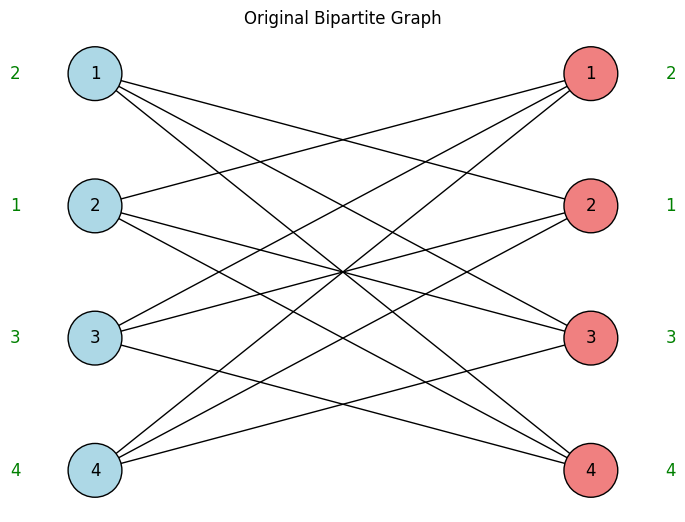

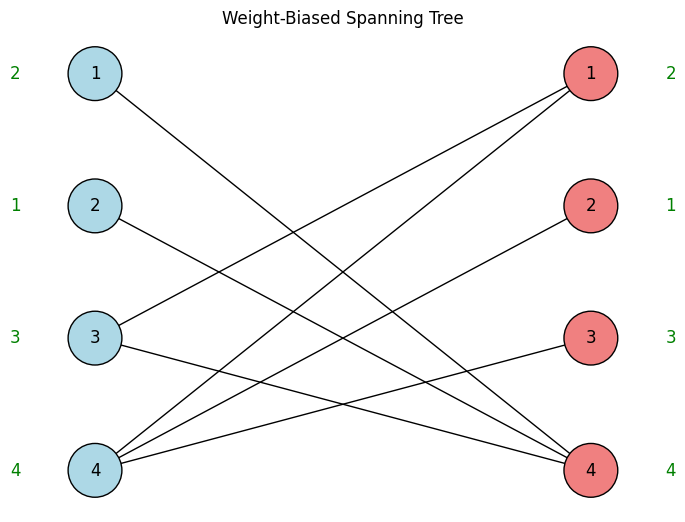

In [12]:
def weight_biased_spanning_tree(G):
    weights = {v: G.nodes[v].get('weight', 0) for v in G.nodes}
    start = max(weights, key=weights.get)
    visited = {start}
    edges_in_tree = []

    heap = []
    for nbr in G.neighbors(start):
        priority = max(weights[start], weights[nbr])
        heapq.heappush(heap, (-priority, start, nbr))

    while len(visited) < G.number_of_nodes() and heap:
        neg_priority, u, v = heapq.heappop(heap)
        if v in visited and u in visited:
            continue

        new_node = v if u in visited else u
        visited.add(new_node)
        edges_in_tree.append((u, v))

        for nbr in G.neighbors(new_node):
            if nbr not in visited:
                priority = max(weights[new_node], weights[nbr])
                heapq.heappush(heap, (-priority, new_node, nbr))

    T = nx.Graph()
    T.add_nodes_from(G.nodes(data=True))
    T.add_edges_from(edges_in_tree)
    return T

def draw_weight_biased_spanning_tree(T, left_nodes, right_nodes):
    n = len(left_nodes)
    pos = get_positions(left_nodes, right_nodes)
    labels = {}
    node_colors = []

    for i, node in enumerate(left_nodes):
        labels[node] = format_label(i + 1)
        node_colors.append("lightblue")
    for i, node in enumerate(right_nodes):
        labels[node] = format_label(i + 1)
        node_colors.append("lightcoral")

    all_nodes = left_nodes + right_nodes

    plt.figure(figsize=(6, n * 1.2))
    nx.draw(T, pos,
            with_labels=False,
            nodelist=all_nodes,
            node_color=node_colors,
            edgecolors='black',
            node_size=1500)

    for node in all_nodes:
        x, y = pos[node]
        plt.text(x, y, labels[node],
                 fontsize=12,
                 ha='center',
                 va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        weight = T.nodes[node].get('weight', '')
        dx = -0.15 if node.startswith("L") else 0.15
        ha = 'right' if node.startswith("L") else 'left'
        plt.text(x + dx, y, f"{weight}", fontsize=12, ha=ha, va='center', color='green')

    plt.axis("off")
    plt.title("Weight-Biased Spanning Tree")
    plt.show()

G, left, right = generate_bipartite_graph(n)
assign_weights(G, left, right, weights)

draw_bipartite_graph(G, left, right)

T = weight_biased_spanning_tree(G)
draw_weight_biased_spanning_tree(T, left, right)

#Filtering Functions

Threshold = 1.5
Nodes in filtered subgraph: ['L0', 'L2', 'L3', 'R0', 'R2', 'R3']
Number of nodes: 6, edges: 6


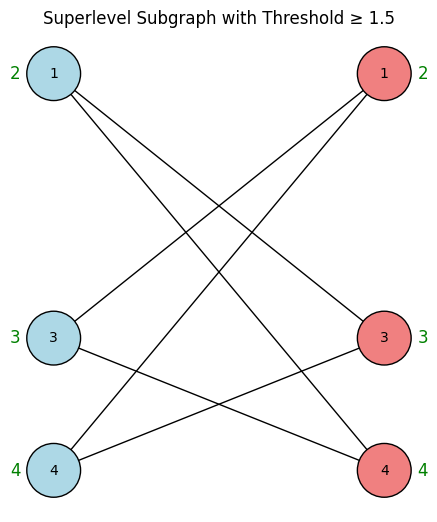

In [13]:
def superlevel_subgraph(G, threshold):
    selected_nodes = [v for v, data in G.nodes(data=True) if data.get('weight', float('-inf')) >= threshold]
    return G.subgraph(selected_nodes).copy()

def draw_filtered_subgraph(G, left_nodes, right_nodes, threshold):
    G_sub = superlevel_subgraph(G, threshold)
    print(f"Threshold = {threshold}")
    print(f"Nodes in filtered subgraph: {list(G_sub.nodes())}")
    print(f"Number of nodes: {G_sub.number_of_nodes()}, edges: {G_sub.number_of_edges()}")

    if G_sub.number_of_nodes() == 0:
        print("No nodes satisfy the threshold condition.")
        return

    pos = {}
    for i, node in enumerate(left_nodes):
        pos[node] = (0, -i)
    for i, node in enumerate(right_nodes):
        pos[node] = (1, -i)

    nodes_sub = list(G_sub.nodes())

    node_colors = []
    labels = {}
    for node in nodes_sub:
        if node in left_nodes:
            node_colors.append("lightblue")
            i = left_nodes.index(node)
        else:
            node_colors.append("lightcoral")
            i = right_nodes.index(node)
        labels[node] = format_label(i + 1)

    plt.figure(figsize=(4, n * 1.2))


    nx.draw(G_sub, pos,
            with_labels=False,
            nodelist=nodes_sub,
            node_color=node_colors,
            edgecolors='black',
            node_size=1500)

    for node in nodes_sub:
        x, y = pos[node]
        plt.text(x, y, labels[node],
                 fontsize=10,
                 ha='center',
                 va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

    for node in nodes_sub:
        x, y = pos[node]
        weight = G_sub.nodes[node].get('weight', '')
        if node in left_nodes:
            plt.text(x - 0.1, y, f"{weight}", fontsize=12, ha='right', va='center', color='green')
        else:
            plt.text(x + 0.1, y, f"{weight}", fontsize=12, ha='left', va='center', color='green')

    plt.title(f"Superlevel Subgraph with Threshold ≥ {threshold}")
    plt.axis("off")
    plt.show()

draw_filtered_subgraph(G, left, right, threshold=1.5)

##Number of Components

Threshold = 1.5
Nodes in filtered subgraph: ['L0', 'L2', 'L3', 'R0', 'R2', 'R3']
Number of nodes: 6, edges: 6
Number of path components in filtered subgraph: 1


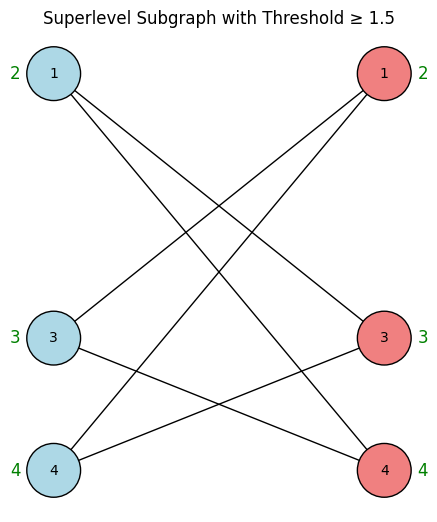

In [14]:
def draw_filtered_subgraph(G, left_nodes, right_nodes, threshold):
    G_sub = superlevel_subgraph(G, threshold)
    print(f"Threshold = {threshold}")
    print(f"Nodes in filtered subgraph: {list(G_sub.nodes())}")
    print(f"Number of nodes: {G_sub.number_of_nodes()}, edges: {G_sub.number_of_edges()}")

    if G_sub.number_of_nodes() == 0:
        print("No nodes satisfy the threshold condition.")
        return

    # Count path components
    num_components = nx.number_connected_components(G_sub)
    print(f"Number of path components in filtered subgraph: {num_components}")

    pos = {}
    for i, node in enumerate(left_nodes):
        pos[node] = (0, -i)
    for i, node in enumerate(right_nodes):
        pos[node] = (1, -i)

    nodes_sub = list(G_sub.nodes())

    node_colors = []
    labels = {}
    for node in nodes_sub:
        if node in left_nodes:
            node_colors.append("lightblue")
            i = left_nodes.index(node)
        else:
            node_colors.append("lightcoral")
            i = right_nodes.index(node)
        labels[node] = format_label(i + 1)

    plt.figure(figsize=(4, n * 1.2))

    nx.draw(G_sub, pos,
            with_labels=False,
            nodelist=nodes_sub,
            node_color=node_colors,
            edgecolors='black',
            node_size=1500)

    for node in nodes_sub:
        x, y = pos[node]
        plt.text(x, y, labels[node],
                 fontsize=10,
                 ha='center',
                 va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

    for node in nodes_sub:
        x, y = pos[node]
        weight = G_sub.nodes[node].get('weight', '')
        if node in left_nodes:
            plt.text(x - 0.1, y, f"{weight}", fontsize=12, ha='right', va='center', color='green')
        else:
            plt.text(x + 0.1, y, f"{weight}", fontsize=12, ha='left', va='center', color='green')

    plt.title(f"Superlevel Subgraph with Threshold ≥ {threshold}")
    plt.axis("off")
    plt.show()


draw_filtered_subgraph(G, left, right, threshold=1.5)

#Circle Representatives

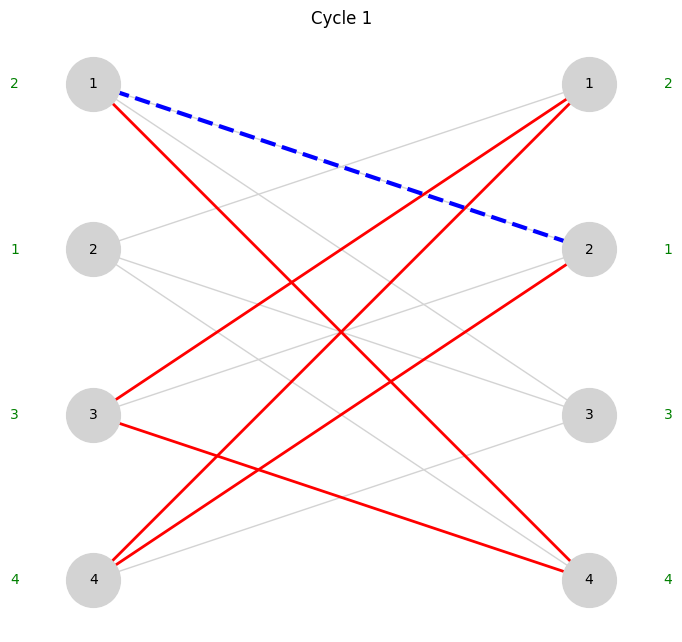

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

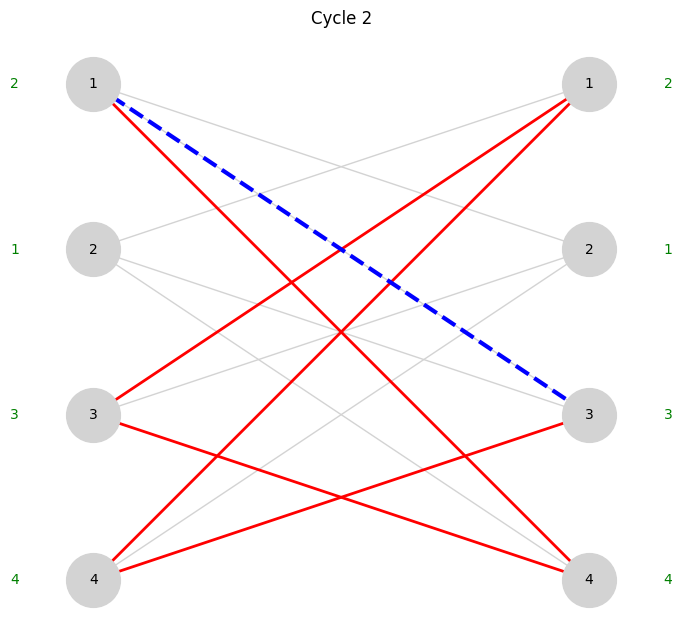

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

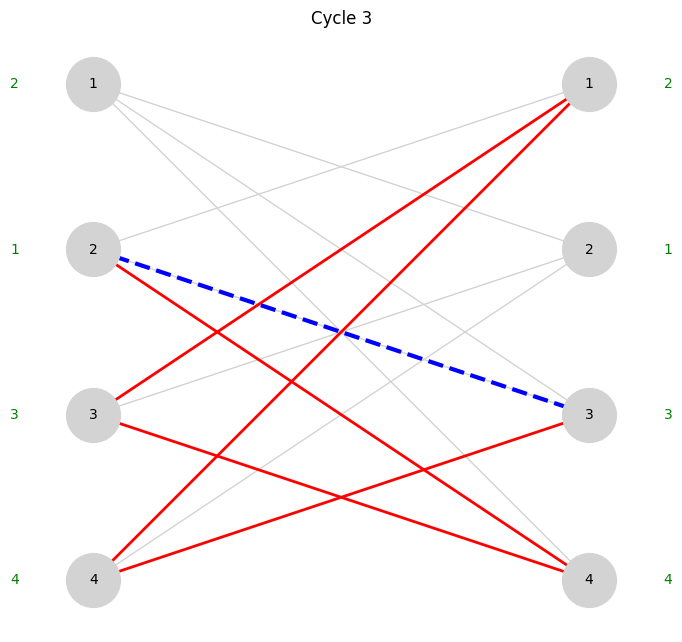

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

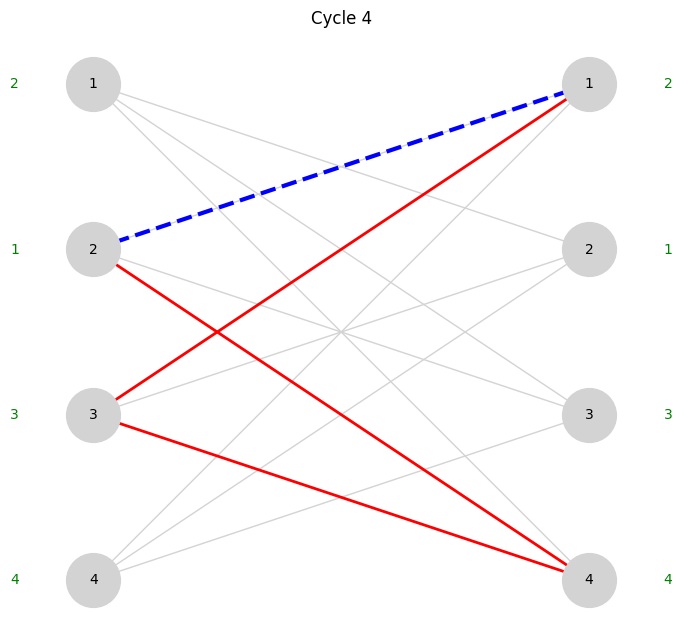

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

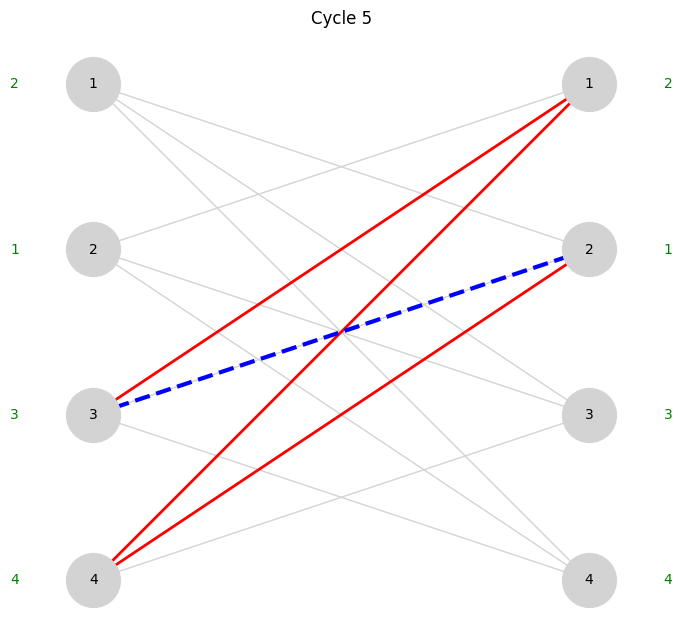

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
def find_cycles_from_non_tree_edges(G, T):
    cycles = []
    tree_edges = set(T.edges()) | {(v, u) for u, v in T.edges()}
    for u, v in G.edges():
        if (u, v) not in tree_edges:
            path = nx.shortest_path(T, source=u, target=v)
            cycle = list(zip(path, path[1:])) + [(u, v)]
            cycles.append(cycle)
    return cycles

def draw_cycle(G, cycle, pos, weights, index, filename=None):
    plt.figure(figsize=(6, 6))

    nx.draw(G, pos, node_color='lightgray', edge_color='lightgray', node_size=1500)

    tree_path_edges = cycle[:-1]
    non_tree_edge = [cycle[-1]]

    nx.draw_networkx_edges(G, pos, edgelist=tree_path_edges, edge_color='red', width=2)
    nx.draw_networkx_edges(G, pos, edgelist=non_tree_edge, edge_color='blue', width=3, style='dashed')

    for node in G.nodes():
        x, y = pos[node]
        label = format_label(int(node[1:]) + 1)
        weight = weights.get(node, '')
        plt.text(x, y, label, fontsize=10, ha='center', va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        dx = -0.15 if node.startswith("L") else 0.15
        ha = 'right' if node.startswith("L") else 'left'
        plt.text(x + dx, y, f"{weight}", fontsize=10, ha=ha, va='center', color='green')

    plt.title(f"Cycle {index + 1}")
    plt.axis("off")
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()
    plt.show()


# --- Example usage ---

G, left, right = generate_bipartite_graph(n)
assign_weights(G, left, right, weights)
pos = get_positions(left, right)

T = weight_biased_spanning_tree(G)
cycles = find_cycles_from_non_tree_edges(G, T)

# Draw and save each cycle
for i, cycle in enumerate(cycles):
    filename = f"cycle_{i + 1}.png"
    draw_cycle(G, cycle, pos, weights={v: G.nodes[v].get('weight', '') for v in G.nodes}, index=i, filename=filename)
    files.download(filename)


#Circle Representatives of subgraphs

Threshold = 1.5
Nodes in filtered subgraph: ['L0', 'L2', 'L3', 'R0', 'R2', 'R3']
Number of nodes: 6, edges: 6


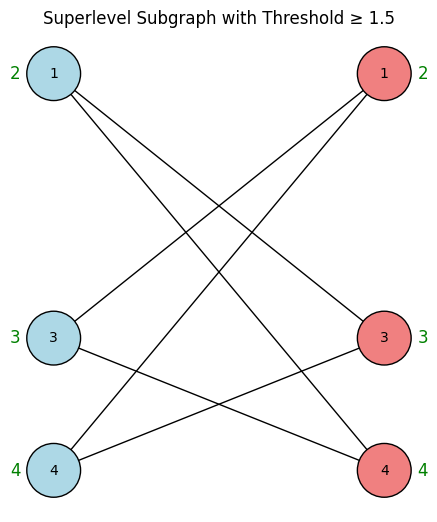

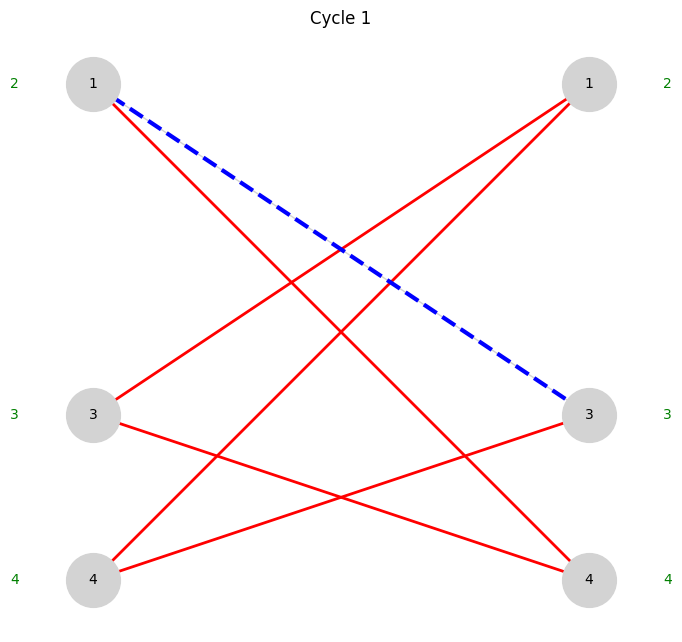

In [22]:
def analyze_and_draw_superlevel_cycles(G, left_nodes, right_nodes, threshold):
    # Extract filtered subgraph
    G_sub = superlevel_subgraph(G, threshold)
    print(f"Threshold = {threshold}")
    print(f"Nodes in filtered subgraph: {list(G_sub.nodes())}")
    print(f"Number of nodes: {G_sub.number_of_nodes()}, edges: {G_sub.number_of_edges()}")

    if G_sub.number_of_nodes() == 0:
        print("No nodes satisfy the threshold condition.")
        return

    # Positions: keep all positions (from original)
    pos = {}
    for i, node in enumerate(left_nodes):
        pos[node] = (0, -i)
    for i, node in enumerate(right_nodes):
        pos[node] = (1, -i)

    # Restrict pos to subgraph nodes only
    pos_sub = {node: pos[node] for node in G_sub.nodes()}

    # Draw filtered subgraph (optional)
    node_colors = []
    labels = {}
    for node in G_sub.nodes():
        if node in left_nodes:
            node_colors.append("lightblue")
            i = left_nodes.index(node)
        else:
            node_colors.append("lightcoral")
            i = right_nodes.index(node)
        labels[node] = format_label(i + 1)

    plt.figure(figsize=(4, len(G_sub.nodes()) * 0.8))
    nx.draw(G_sub, pos_sub,
            with_labels=False,
            node_color=node_colors,
            edgecolors='black',
            node_size=1500)

    for node in G_sub.nodes():
        x, y = pos_sub[node]
        plt.text(x, y, labels[node],
                 fontsize=10,
                 ha='center',
                 va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

    for node in G_sub.nodes():
        x, y = pos_sub[node]
        weight = G_sub.nodes[node].get('weight', '')
        if node in left_nodes:
            plt.text(x - 0.1, y, f"{weight}", fontsize=12, ha='right', va='center', color='green')
        else:
            plt.text(x + 0.1, y, f"{weight}", fontsize=12, ha='left', va='center', color='green')

    plt.title(f"Superlevel Subgraph with Threshold ≥ {threshold}")
    plt.axis("off")
    plt.show()

    # Compute spanning tree on subgraph
    T_sub = weight_biased_spanning_tree(G_sub)

    # Find cycles in subgraph
    cycles_sub = find_cycles_from_non_tree_edges(G_sub, T_sub)

    # Draw cycles in subgraph
    for i, cycle in enumerate(cycles_sub):
        draw_cycle(G_sub, cycle, pos_sub, nx.get_node_attributes(G_sub, 'weight'), i)


# Usage example
analyze_and_draw_superlevel_cycles(G, left, right, threshold=1.5)


#Draw a Cycle Manually

In [23]:
# Example: manually specify a valid cycle
manual_cycle = ["L1", "R2", "L3", "R1", "L2", "R3", "L1"]  # Must start and end at same node
manual_nodes = ["L1", "R2", "L3", "R1", "L2", "R3", "L1"]
manual_edges = list(zip(manual_nodes, manual_nodes[1:]))

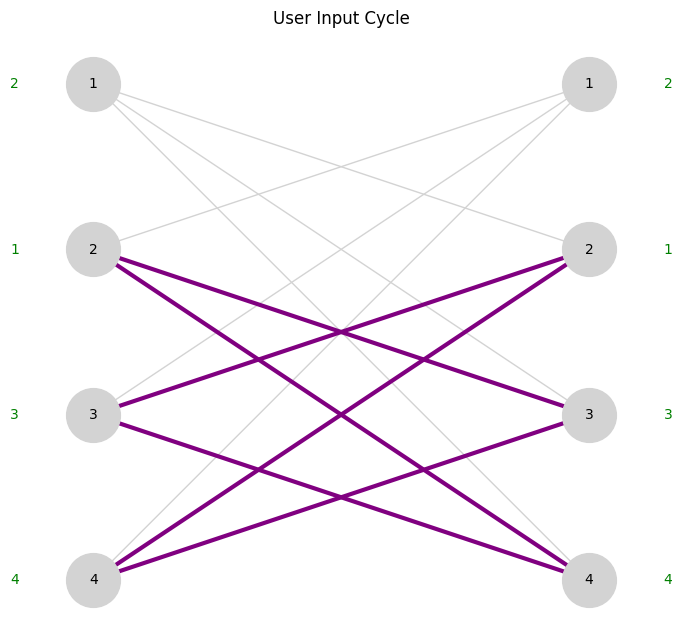

In [24]:
def is_valid_cycle(G, cycle):
    """Check if a cycle is valid in G (each consecutive pair must be an edge, and must close)."""
    if len(cycle) < 3 or cycle[0] != cycle[-1]:
        return False
    for u, v in zip(cycle, cycle[1:]):
        if not G.has_edge(u, v):
            return False
    return True

def draw_manual_cycle(G, cycle, pos, weights, title="Manual Cycle"):
    plt.figure(figsize=(6, 6))

    # Draw ambient graph in light gray
    nx.draw(G, pos, node_color='lightgray', edge_color='lightgray', node_size=1500)

    # Format cycle as edge list
    cycle_edges = list(zip(cycle, cycle[1:]))

    # Draw cycle edges
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='purple', width=3)

    # Draw labels and weights
    for node in G.nodes():
        x, y = pos[node]
        label = format_label(int(node[1:]) + 1)
        weight = weights.get(node, '')
        plt.text(x, y, label, fontsize=10, ha='center', va='center',
                 bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        dx = -0.15 if node.startswith("L") else 0.15
        ha = 'right' if node.startswith("L") else 'left'
        plt.text(x + dx, y, f"{weight}", fontsize=10, ha=ha, va='center', color='green')

    plt.title(title)
    plt.axis("off")
    plt.show()

# Check if the cycle is valid
if is_valid_cycle(G, manual_cycle):
    # Draw it
    draw_manual_cycle(G, manual_cycle, pos, nx.get_node_attributes(G, 'weight'), title="User Input Cycle")


In [25]:
def edgeset(cycle_edges):
    """Convert a list of edges into a set of frozensets (so undirected edges match)."""
    return set(frozenset(e) for e in cycle_edges)

##Greedy

In [20]:
def decompose_manual_cycle(manual_cycle_edges, fundamental_cycles):
    manual_set = edgeset(manual_cycle_edges)

    # Try all subsets of fundamental cycles (greedy for now)
    decomposition = []
    current = set()

    for i, fcycle in enumerate(fundamental_cycles):
        fset = edgeset(fcycle)
        if manual_set & fset:  # overlap?
            current ^= fset    # symmetric difference
            decomposition.append(i)

    if current == manual_set:
        return decomposition
    else:
        print("Could not fully decompose the manual cycle.")
        return None


##Exhausive

Manual cycle = XOR of fundamental cycles: [2, 4]


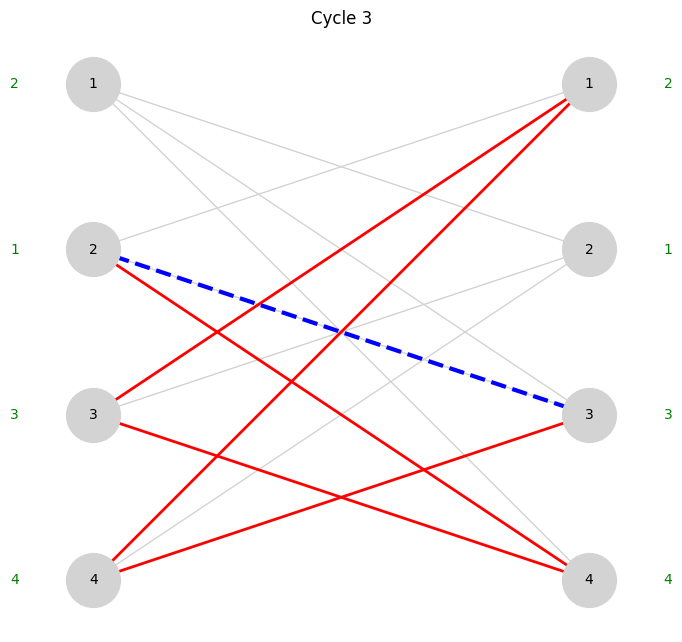

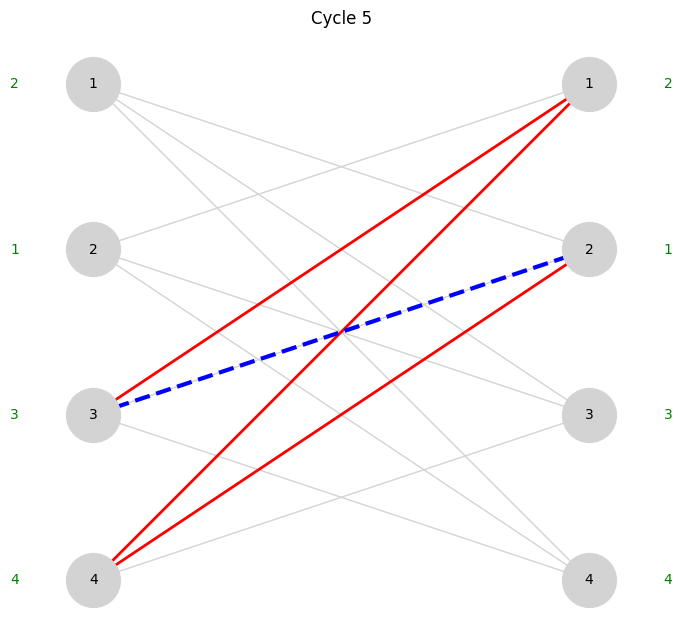

In [26]:
from itertools import combinations
fundamental_cycles = find_cycles_from_non_tree_edges(G, T)

def decompose_manual_cycle_exact(manual_cycle_edges, fundamental_cycles):
    manual_set = edgeset(manual_cycle_edges)

    for r in range(1, len(fundamental_cycles) + 1):
        for idx_tuple in combinations(range(len(fundamental_cycles)), r):
            combined = set()
            for i in idx_tuple:
                combined ^= edgeset(fundamental_cycles[i])
            if combined == manual_set:
                return list(idx_tuple)

    print("Could not decompose the manual cycle using fundamental cycles.")
    return None

indices = decompose_manual_cycle_exact(manual_edges, cycles)

if indices is not None:
    print("Manual cycle = XOR of fundamental cycles:", indices)
    for idx in indices:
        draw_cycle(G, cycles[idx], pos, nx.get_node_attributes(G, 'weight'), idx)